In [351]:
import numpy as np
import pandas as pd

In [352]:
df = pd.read_csv('housing.csv')
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

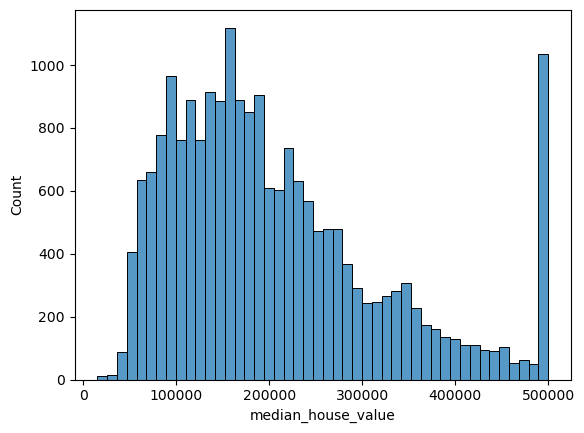

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.histplot(df.median_house_value)

Question 1
Find a feature with missing values. How many missing values does it have?

In [354]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'population'?

In [355]:
df['population'].median()

1166.0

Data Prep

In [356]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [357]:
def clean_and_train(r):
    idx = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[idx[n_train:]]
    df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
    df_test = df_shuffled.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_test['median_house_value']
    del df_train['median_house_value']
    del df_val['median_house_value']

    df_zero_train = df_train.copy()
    df_zero_train['total_bedrooms'] = df_zero_train['total_bedrooms'].fillna(value = 0)
    w_0_zero, w_zero = train_linear_regression(df_mean_train, y_train)

    df_zero_val = df_val.copy()
    df_zero_val['total_bedrooms'] = df_zero_val['total_bedrooms'].fillna(value = 0)

    y_zero_pred_val = w_0_zero + df_zero_val.dot(w_zero)

    return np.round(rmse(y_val, y_zero_pred_val),2)


In [358]:
df_train = df_shuffled.iloc[idx[:n_train]]
df_val = df_shuffled.iloc[idx[n_train:n_train+n_val]]
df_test = df_shuffled.iloc[idx[n_train+n_val:]]

# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [359]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [360]:
del df_test['median_house_value']
del df_train['median_house_value']
del df_val['median_house_value']

In [361]:
# df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [362]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [363]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [364]:
mean = df_train.total_bedrooms.mean()

df_mean_train = df_train.copy()
df_mean_train['total_bedrooms'] = df_mean_train['total_bedrooms'].fillna(value = mean)
w_0_mean, w_mean = train_linear_regression(df_mean_train, y_train)

df_mean_val = df_val.copy()
df_mean_val['total_bedrooms'] = df_mean_val['total_bedrooms'].fillna(value = mean)

y_mean_pred_val = w_0_mean + df_mean_val.dot(w_mean)

np.round(rmse(y_val, y_mean_pred_val),2)



0.34

In [365]:

df_zero_train = df_train.copy()
df_zero_train['total_bedrooms'] = df_zero_train['total_bedrooms'].fillna(value = 0)
w_0_zero, w_zero = train_linear_regression(df_mean_train, y_train)

df_zero_val = df_val.copy()
df_zero_val['total_bedrooms'] = df_zero_val['total_bedrooms'].fillna(value = 0)

y_zero_pred_val = w_0_zero + df_zero_val.dot(w_zero)

np.round(rmse(y_val, y_zero_pred_val),2)

0.34

Question 4

In [366]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [367]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(df_zero_train, y_train, r=r)
    y_null_reg_val = w_0 + df_zero_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -11.656344589478822 0.34
1e-06 -11.656328700279206 0.34
0.0001 -11.654755895147064 0.34
0.001 -11.640477103523434 0.34
0.01 -11.499589722571592 0.34
0.1 -10.257998426829026 0.34
1 -4.931613572697172 0.35
5 -1.489184857529709 0.35
10 -0.7941313736526514 0.35


Question 5

In [368]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        idx = np.arange(n)
        np.random.seed(r)
        np.random.shuffle(idx)
        
        df_shuffled = df.iloc[idx]

        df_train = df_shuffled.iloc[:n_train].copy()
        df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
        df_test = df_shuffled.iloc[n_train+n_val:].copy()

        df_train = df_train.reset_index(drop=True)
        df_val = df_val.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)

        y_train = np.log1p(df_train.median_house_value.values)
        y_val = np.log1p(df_val.median_house_value.values)
        y_test = np.log1p(df_test.median_house_value.values)

        del df_test['median_house_value']
        del df_train['median_house_value']
        del df_val['median_house_value']

        df_zero_train = df_train.copy()
        df_zero_train['total_bedrooms'] = df_zero_train['total_bedrooms'].fillna(value = 0)
        w_0_zero, w_zero = train_linear_regression(df_zero_train, y_train)

        df_zero_val = df_val.copy()
        df_zero_val['total_bedrooms'] = df_zero_val['total_bedrooms'].fillna(value = 0)

        y_zero_pred_val = w_0_zero + df_zero_val.dot(w_zero)

        rmse_result =  np.round(rmse(y_val, y_zero_pred_val),2)
        rmse_list.append(rmse_result)
        print(r,w_0_zero, rmse_result)

np.round(np.std(rmse_list),3)

0 -11.900382138250363 0.34
1 -11.732757373224729 0.34
2 -11.806729360928998 0.33
3 -11.587900347706451 0.34
4 -11.389470588473802 0.34
5 -11.447114275993977 0.34
6 -11.370516351690585 0.35
7 -12.473448918447502 0.34
8 -11.800287429301962 0.35
9 -11.45904683062324 0.34


0.005

Question 6

In [369]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_test['median_house_value']
del df_train['median_house_value']
del df_val['median_house_value']

df_zero_train = df_train.copy()
df_zero_train['total_bedrooms'] = df_zero_train['total_bedrooms'].fillna(value = 0)
w_0_zero, w_zero = train_linear_regression_reg(df_zero_train, y_train, r=0.001)

df_zero_val = df_val.copy()
df_zero_val['total_bedrooms'] = df_zero_val['total_bedrooms'].fillna(value = 0)

y_zero_pred_val = w_0_zero + df_zero_val.dot(w_zero)

rmse_result =  np.round(rmse(y_val, y_zero_pred_val),2)
print(rmse_result)

0.34
